# Classify MNIST and Traffic Signs with Scikit-Learn

In [78]:
from sklearn.datasets import fetch_mldata
import numpy as np
import numpy.random
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import random

In [79]:
mnist = fetch_mldata('MNIST original')

In [80]:
X_mnist, y_mnist = mnist['data'], mnist['target']

2.0


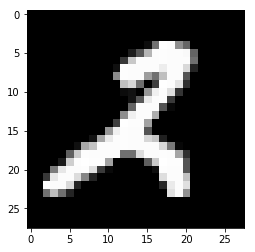

In [82]:
def display(X, y, n):
    plt.imshow(X[n].reshape(28, 28), cmap='gray')
    print(y[n])
    
display(X_mnist, y_mnist, numpy.random.randint(0, X.shape[0]))

In [83]:
shuffle_index = np.random.permutation(X_mnist.shape[0])
X_mnist, y_mnist = X_mnist[shuffle_index], y_mnist[shuffle_index]

In [84]:
split_n = 60000
X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test \
    = X_mnist[:split_n], X_mnist[split_n:], y_mnist[:split_n], y_mnist[split_n:]

In [85]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [ ]:
cross_val_score(RandomForestClassifier(), X, y, cv=3, scoring='accuracy')

In [ ]:
cross_val_score(SGDClassifier(), X, y, cv=3, scoring='accuracy')

In [ ]:
cross_val_score(LogisticRegression(), X, y, cv=3, scoring='accuracy')

In [ ]:
cross_val_score(GradientBoostingClassifier(), X, y, cv=3, scoring='accuracy')

Let's take a look at a particular prediction:

In [87]:
clf = RandomForestClassifier()
_ = clf.fit(X_mnist_train, y_mnist_train)

**The classifier achieves high accuracy on MNIST dataset:**

In [88]:
accuracy_score(y_mnist_test, clf.predict(X_mnist_test))

0.94679999999999997

Prediction: [ 5.]
5.0


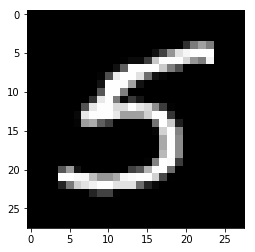

In [91]:
def display_letter_predict():
    i = random.randint(0, X_mnist_test.shape[0])
    print('Prediction:', clf.predict([X_mnist_test[i]]))
    display(X_mnist_test, y_mnist_test, i)

display_letter_predict()

# Traffic Sign Recogntion With A Basic Classifier

## Load Data

In [59]:
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
import csv

In [60]:
import pickle

training_file = 'traffic-signs-data/train.p'
validation_file='traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [63]:
def read_sign_names():
    with open('signnames.csv', 'rt') as f:
        reader = csv.reader(f)
        reader.__next__() # Skipe the header
        return {int(r[0]): r[1] for r in reader}
    
def test_image(test_set, test_labels, class_names):
    for index in random.sample(range(len(test_set)), 10):
        image = test_set[index].squeeze()
        cls_name = class_names[test_labels[index]]
        plt.figure(figsize=(1,1))
        plt.imshow(image)
        plt.figtext(0, 0, cls_name)
#         return image

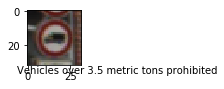

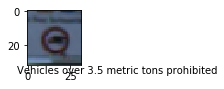

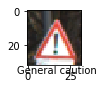

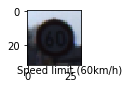

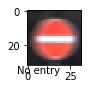

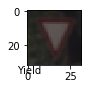

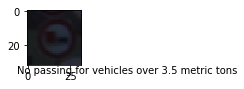

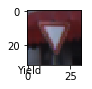

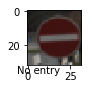

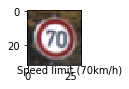

In [64]:
class_names = read_sign_names()
test_image(X_train, y_train, class_names)

In [65]:
def normalize(image_data, min_x=None, max_x=None):
    """ 
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    # TODO: Implement Min-Max scaling for grayscale image data
    min_x = np.min(image_data) if min_x is None else min_x
    max_x = np.max(image_data) if max_x is None else max_x
    a, b = 0.1, 0.9
    result = a + (image_data - min_x) * (b - a) / (max_x - min_x)
    return result, min_x, max_x

X_train_norm, min_x, max_x = normalize(X_train)
X_valid_norm, _, _ = normalize(X_valid, min_x, max_x)
X_test_norm, _, _ = normalize(X_test, min_x, max_x)

In [66]:
new_shape = (-1, 32 * 32, 3)
X_train_norm = X_train_norm.reshape(new_shape)
X_valid_norm = X_valid_norm.reshape(new_shape)
X_test_norm = X_test_norm.reshape(new_shape)

In [67]:
# def to_grayscale(arr):
#     assert arr.shape[0] == 3
#     return arr[0]*0.299 + arr[1]*0.587 + arr[2] * 0.114
weights = np.array([0.299, 0.587, 0.114])  # RGB -> GRAY

X_train_gray = np.average(X_train_norm, weights=weights.ravel(), axis=2)
X_valid_gray = np.average(X_valid_norm, weights=weights.ravel(), axis=2)
X_test_gray = np.average(X_test_norm, weights=weights.ravel(), axis=2)

In [70]:
X = np.concatenate((X_train_gray, X_valid_gray))
y = np.concatenate((y_train, y_valid))

**Low accuracy of predicion for Traffic signs:**

In [71]:
rf = RandomForestClassifier(oob_score=True)
%time rf.fit(X_train_gray, y_train)
print('Train: ', rf.oob_score_)
print('Valid: ', accuracy_score(y_valid, rf.predict(X_valid_gray)))

CPU times: user 16 s, sys: 294 ms, total: 16.3 s
Wall time: 15.9 s
Train:  0.791976780942
Valid:  0.611111111111


/Users/kalininalex/miniconda3/envs/py35_intel/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/kalininalex/miniconda3/envs/py35_intel/lib/python3.5/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [72]:
def show_pred(clf, X, y, X_color):
    i = random.randint(0, X.shape[0])
    index = clf.predict([X[i]])[0]
#     print(index)
    print('Prediction:', class_names[index])
    print('Fact:', class_names[y[i]])
    plt.figure(0)
    plt.imshow(X[i].reshape(32, 32), cmap='gray')
    plt.figure(1)
    plt.imshow(X_color[i])

Prediction: No passing
Fact: Vehicles over 3.5 metric tons prohibited


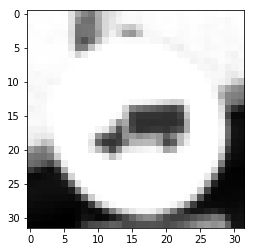

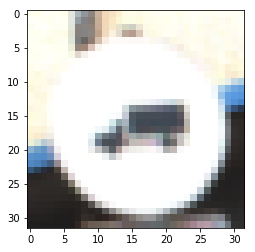

In [73]:
show_pred(rf, X_valid_gray, y_valid, X_valid)

In [ ]:
def test_classifier(clf, x_train=X_train_gray, y_train=y_train, x_valid=X_valid_gray, y_valid=y_valid):
    %time clf.fit(x_train, y_train)
    print('Train: ', accuracy_score(y_train, clf.predict(x_train)))
    print('Valid: ', accuracy_score(y_valid, clf.predict(x_valid)))    
    return clf

In [ ]:
sgd = test_classifier(SGDClassifier())

In [ ]:
# test_classifier(LogisticRegression(C=1))